In [1]:
#@title Licensed under the Apache License, Version 2.0 (the "License");
# you may not use this file except in compliance with the License.
# You may obtain a copy of the License at
#
# https://www.apache.org/licenses/LICENSE-2.0
#
# Unless required by applicable law or agreed to in writing, software
# distributed under the License is distributed on an "AS IS" BASIS,
# WITHOUT WARRANTIES OR CONDITIONS OF ANY KIND, either express or implied.
# See the License for the specific language governing permissions and
# limitations under the License.

## Download the neccessary data into the Colab Instance

In [2]:
'''
!wget --no-check-certificate \
    https://storage.googleapis.com/laurencemoroney-blog.appspot.com/horse-or-human.zip \
    -O ./datasets/horse-or-human.zip

!wget --no-check-certificate \
    https://storage.googleapis.com/laurencemoroney-blog.appspot.com/validation-horse-or-human.zip \
    -O ./datasets/validation-horse-or-human.zip
'''

'\n!wget --no-check-certificate     https://storage.googleapis.com/laurencemoroney-blog.appspot.com/horse-or-human.zip     -O ./datasets/horse-or-human.zip\n\n!wget --no-check-certificate     https://storage.googleapis.com/laurencemoroney-blog.appspot.com/validation-horse-or-human.zip     -O ./datasets/validation-horse-or-human.zip\n'

In [3]:
import os
import zipfile
local_zip = './datasets/horse-or-human.zip'
zip_ref = zipfile.ZipFile(local_zip, 'r')
zip_ref.extractall('./datasets/horse-or-human')
local_zip = './datasets/validation-horse-or-human.zip'
zip_ref = zipfile.ZipFile(local_zip, 'r')
zip_ref.extractall('./datasets/validation-horse-or-human')
zip_ref.close()




In [4]:
# Directory with our training horse pictures
train_horse_dir = os.path.join('./datasets/horse-or-human/horses')
# Directory with our training human pictures
train_human_dir = os.path.join('./datasets/horse-or-human/humans')
# Directory with our training horse pictures
validation_horse_dir = os.path.join('./datasets/validation-horse-or-human/horses')
# Directory with our training human pictures
validation_human_dir = os.path.join('./datasets/validation-horse-or-human/humans')
train_horse_names = os.listdir('./datasets/horse-or-human/horses')
print(train_horse_names[:10])
train_human_names = os.listdir('./datasets/horse-or-human/humans')
print(train_human_names[:10])
validation_horse_hames = os.listdir('./datasets/validation-horse-or-human/horses')
print(validation_horse_hames[:10])
validation_human_names = os.listdir('./datasets/validation-horse-or-human/humans')
print(validation_human_names[:10])

['horse43-5.png', 'horse06-5.png', 'horse20-6.png', 'horse04-7.png', 'horse41-7.png', 'horse22-4.png', 'horse19-2.png', 'horse24-2.png', 'horse37-8.png', 'horse02-1.png']
['human17-22.png', 'human10-17.png', 'human10-03.png', 'human07-27.png', 'human09-22.png', 'human05-22.png', 'human02-03.png', 'human02-17.png', 'human15-27.png', 'human12-12.png']
['horse1-204.png', 'horse2-112.png', 'horse3-498.png', 'horse5-032.png', 'horse5-018.png', 'horse1-170.png', 'horse5-192.png', 'horse1-411.png', 'horse4-232.png', 'horse3-070.png']
['valhuman04-20.png', 'valhuman03-01.png', 'valhuman04-08.png', 'valhuman03-15.png', 'valhuman01-04.png', 'valhuman01-10.png', 'valhuman01-11.png', 'valhuman01-05.png', 'valhuman03-14.png', 'valhuman03-00.png']


In [5]:
import tensorflow as tf

## Define your model and optimizer

In [6]:
model = tf.keras.models.Sequential([
    # Note the input shape is the desired size of the image with 3 bytes color
    # This is the first convolution
    tf.keras.layers.Conv2D(32, (5,5), activation='relu', input_shape=(300, 300, 3)),
    tf.keras.layers.MaxPooling2D(2, 2),
    # The second convolution
    tf.keras.layers.Conv2D(64, (5,5), activation='relu'),
    tf.keras.layers.MaxPooling2D(2,2),
    # The third convolution
    tf.keras.layers.Conv2D(128, (3,3), activation='relu'),
    tf.keras.layers.MaxPooling2D(2,2),
    # The fourth convolution
    #tf.keras.layers.Conv2D(256, (3,3), activation='relu'),
    #tf.keras.layers.MaxPooling2D(2,2),
    # Flatten the results to feed into a DNN
    tf.keras.layers.Flatten(),
    # 512 neuron hidden layer
    tf.keras.layers.Dense(512, activation='relu'),
    tf.keras.layers.Dense(256, activation='relu'),
    # Only 1 output neuron. It will contain a value from 0-1 where 0 for 1 class ('horses') and 1 for the other ('humans')
    tf.keras.layers.Dense(1, activation='sigmoid')
])

Metal device set to: Apple M1 Pro

systemMemory: 32.00 GB
maxCacheSize: 10.67 GB



2022-05-11 22:06:26.061680: I tensorflow/core/common_runtime/pluggable_device/pluggable_device_factory.cc:305] Could not identify NUMA node of platform GPU ID 0, defaulting to 0. Your kernel may not have been built with NUMA support.
2022-05-11 22:06:26.062124: I tensorflow/core/common_runtime/pluggable_device/pluggable_device_factory.cc:271] Created TensorFlow device (/job:localhost/replica:0/task:0/device:GPU:0 with 0 MB memory) -> physical PluggableDevice (device: 0, name: METAL, pci bus id: <undefined>)


In [7]:
print(model.summary())

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d (Conv2D)             (None, 296, 296, 32)      2432      
                                                                 
 max_pooling2d (MaxPooling2D  (None, 148, 148, 32)     0         
 )                                                               
                                                                 
 conv2d_1 (Conv2D)           (None, 144, 144, 64)      51264     
                                                                 
 max_pooling2d_1 (MaxPooling  (None, 72, 72, 64)       0         
 2D)                                                             
                                                                 
 conv2d_2 (Conv2D)           (None, 70, 70, 128)       73856     
                                                                 
 max_pooling2d_2 (MaxPooling  (None, 35, 35, 128)      0

In [8]:
from tensorflow.keras.optimizers import RMSprop
optimizer = RMSprop(lr=0.0001)
model.compile(loss='binary_crossentropy',
              optimizer=optimizer,
              metrics=['acc'])

/Users/remco/miniforge3/envs/tinyML-env/lib/python3.9/site-packages/keras/optimizer_v2/rmsprop.py:130: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  super(RMSprop, self).__init__(name, **kwargs)


## Organize your data into Generators

In [9]:
from tensorflow.keras.preprocessing.image import ImageDataGenerator

# All images will be augmented according to whichever lines are uncommented below.
# we can first try without any of the augmentation beyond the rescaling
train_datagen = ImageDataGenerator(
      rescale=1./255,
      rotation_range=10,
      width_shift_range=0.1,
      height_shift_range=0.1,
      shear_range=0.1,
      zoom_range=0.1,
      horizontal_flip=True,
      fill_mode='nearest'
      )

# Flow training images in batches of 128 using train_datagen generator
train_generator = train_datagen.flow_from_directory(
        './datasets/horse-or-human/',  # This is the source directory for training images
        target_size=(300, 300),  # All images will be resized to 100x100
        batch_size=128,
        # Since we use binary_crossentropy loss, we need binary labels
        class_mode='binary')

validation_datagen = ImageDataGenerator(rescale=1./255)

validation_generator = validation_datagen.flow_from_directory(
        './datasets/validation-horse-or-human',
        target_size=(300, 300),
        class_mode='binary')


Found 1028 images belonging to 2 classes.
Found 256 images belonging to 2 classes.


## Train your model
This may take a little while. Remember we are now building and training relatively complex computer vision models!

In [10]:
history = model.fit(
      train_generator,
      steps_per_epoch=8,  
      epochs=15,
      verbose=1,
      validation_data=validation_generator)

Epoch 1/15


2022-05-11 22:06:28.088668: W tensorflow/core/platform/profile_utils/cpu_utils.cc:128] Failed to get CPU frequency: 0 Hz
2022-05-11 22:06:28.415084: I tensorflow/core/grappler/optimizers/custom_graph_optimizer_registry.cc:113] Plugin optimizer for device_type GPU is enabled.


8/8 [==============================] - ETA: 0s - loss: 1.2173 - acc: 0.4867

2022-05-11 22:06:41.135816: I tensorflow/core/grappler/optimizers/custom_graph_optimizer_registry.cc:113] Plugin optimizer for device_type GPU is enabled.


8/8 [==============================] - 14s 1s/step - loss: 1.2173 - acc: 0.4867 - val_loss: 0.6603 - val_acc: 0.5078
Epoch 2/15
8/8 [==============================] - 12s 1s/step - loss: 0.6165 - acc: 0.6989 - val_loss: 0.4795 - val_acc: 0.7578
Epoch 3/15
8/8 [==============================] - 13s 1s/step - loss: 0.4727 - acc: 0.8056 - val_loss: 0.5858 - val_acc: 0.7344
Epoch 4/15
8/8 [==============================] - 12s 1s/step - loss: 0.4302 - acc: 0.7889 - val_loss: 0.9084 - val_acc: 0.6719
Epoch 5/15
8/8 [==============================] - 12s 1s/step - loss: 0.4496 - acc: 0.8500 - val_loss: 1.1912 - val_acc: 0.6641
Epoch 6/15
8/8 [==============================] - 12s 1s/step - loss: 0.3236 - acc: 0.8678 - val_loss: 1.1555 - val_acc: 0.7188
Epoch 7/15
8/8 [==============================] - 12s 2s/step - loss: 0.4389 - acc: 0.8722 - val_loss: 1.3613 - val_acc: 0.6719
Epoch 8/15
8/8 [==============================] - 12s 2s/step - loss: 0.2389 - acc: 0.9000 - val_loss: 1.5576 - val

## Run your Model

Let's now take a look at actually running a prediction using the model. This code will allow you to choose 1 or more files from your file system, it will then upload them, and run them through the model, giving an indication of whether the object is a horse or a human. **Was the model correct? Try a couple more images and see if you can confuse it!**

In [11]:
import numpy as np
from keras.preprocessing import image

uploaded = os.scandir('datasets/own_photos')
for fn in uploaded:
  
  # predicting images
  if fn.is_file() and fn.name != '.DS_Store':
    path = './datasets/own_photos/' + fn.name
    img = image.load_img(path, target_size=(300, 300))
    x = image.img_to_array(img)
    x = x / 255.0
    x = np.expand_dims(x, axis=0)

    image_tensor = np.vstack([x])
    classes = model.predict(image_tensor)
    # print(classes)
    # print(classes[0])
    if classes[0]>0.5:
      print(fn.name + " is a human")
    else:
      print(fn.name + " is a horse")
  

2022-05-11 22:09:35.418161: I tensorflow/core/grappler/optimizers/custom_graph_optimizer_registry.cc:113] Plugin optimizer for device_type GPU is enabled.


human02-01.png is a human
e113d3d9-a97b-42da-b18e-a4b105ea9615.jpg is a horse
de4662c4-d9f3-4402-ae27-a4f89742cfc4.jpg is a horse
horse06-7.png is a horse
2fa5ff1f-f301-4d89-ad86-7f4f6beb10ed.jpg is a human
horse04-2.png is a horse
159087d5-afb3-4b2f-a7d8-3f3277c33f0c.jpg is a horse
7e76fbaf-dec0-4ed3-bec0-c3a7afa21eda.jpg is a horse
IMG_2161.JPG is a horse
human06-10.png is a human
DSC_0626 359.jpg is a human
d5817af0-a883-40ff-a7d5-0e2a8e412898.jpg is a horse
d402a909-b6d8-4384-a642-2d37c1161e1f.jpg is a horse
horse01-2.png is a horse
c56100c1-97cc-449f-8a97-4506bff6020f.jpg is a horse
human03-24.png is a human
IMG_2041.jpeg is a horse
d4cdeae2-310e-4d8f-b1fc-b5120f0828a4.jpg is a horse
human03-07.png is a human
997df78b-55e7-4c19-a8dd-d19c92ccbffc.jpg is a horse
IMG_1379.jpeg is a horse
horse12-7.png is a horse
horse17-5.png is a horse
human05-05.png is a human
horse17-1.png is a horse
human07-03.png is a human
human02-26.png is a human
b59f8d3b-f8d4-400d-875d-34684063cafb.jpg is a 

## Finally lets visualize all of the model layers!

./datasets/horse-or-human/humans/human15-14.png

2022-05-11 22:09:37.078066: I tensorflow/core/grappler/optimizers/custom_graph_optimizer_registry.cc:113] Plugin optimizer for device_type GPU is enabled.
/var/folders/c0/gwh5l76125v2rqv6dwf5ltkh0000gn/T/ipykernel_1269/95898971.py:53: RuntimeWarning: invalid value encountered in true_divide
  x /= x.std()


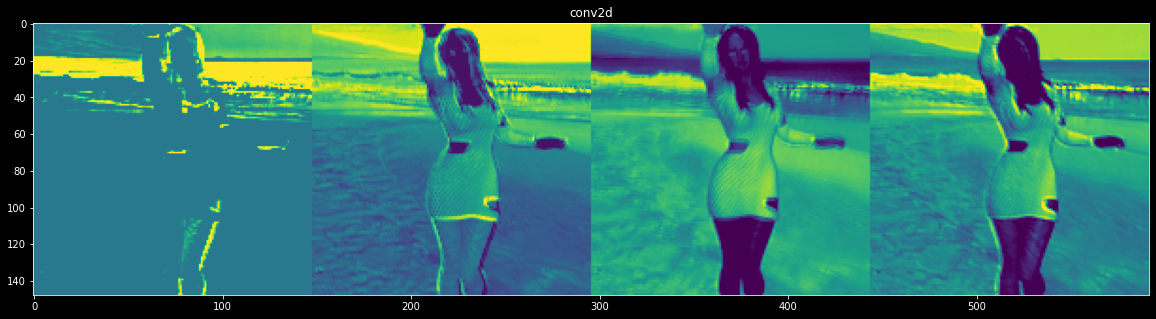

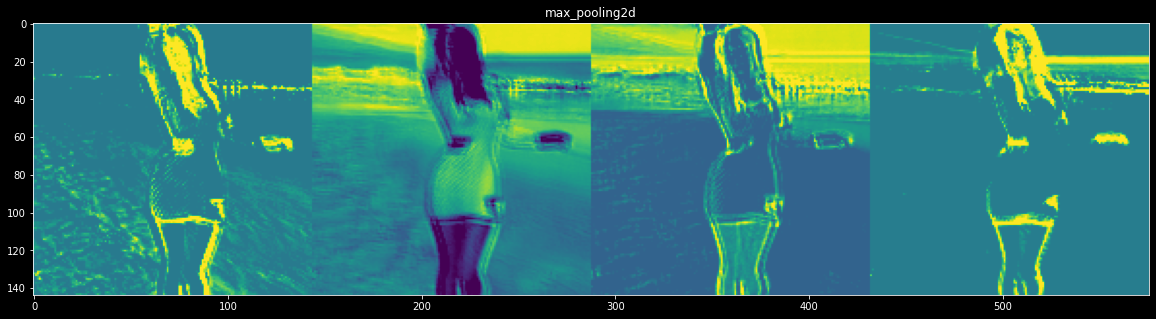

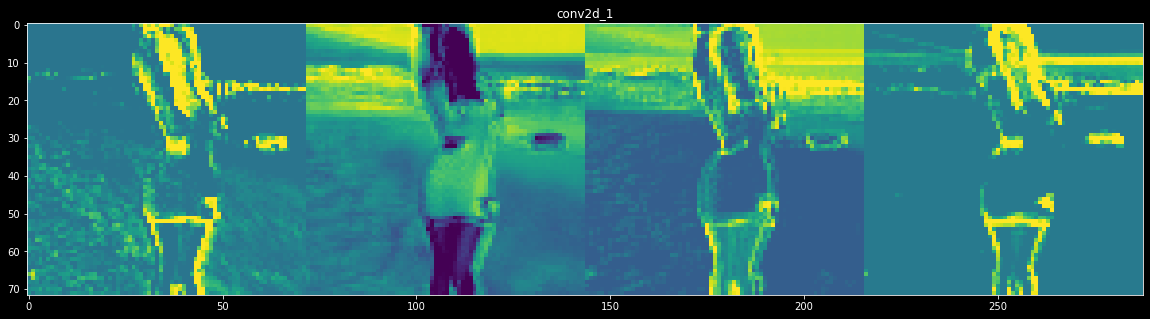

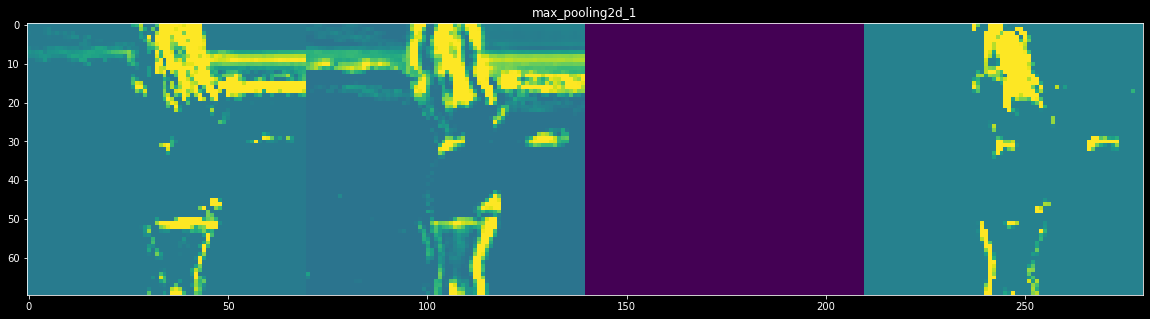

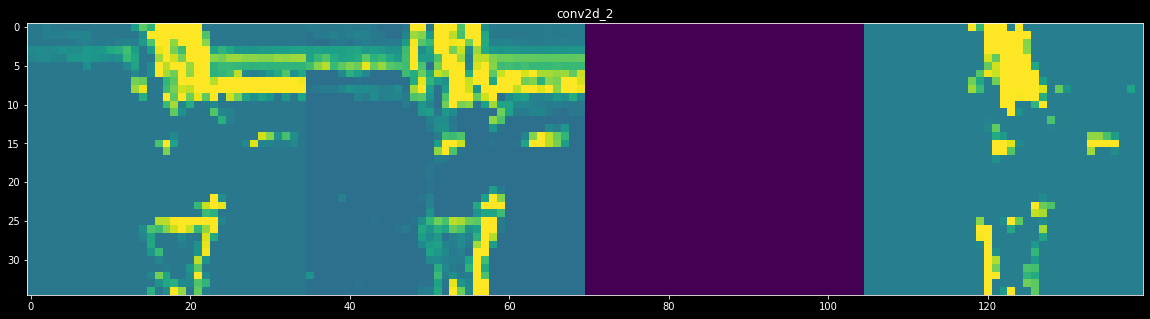

In [12]:
import matplotlib.pyplot as plt
import numpy as np
import random
from tensorflow.keras.preprocessing.image import img_to_array, load_img

# %matplotlib inline

import matplotlib.pyplot as plt
import matplotlib.image as mpimg

# Let's define a new Model that will take an image as input, and will output
# intermediate representations for all layers in the previous model after the first.
successive_outputs = [layer.output for layer in model.layers[1:]]
visualization_model = tf.keras.models.Model(inputs = model.input, outputs = successive_outputs)
# Let's prepare a random input image from the training set.
horse_img_files = [os.path.join(train_horse_dir, f) for f in train_horse_names]
human_img_files = [os.path.join(train_human_dir, f) for f in train_human_names]
img_path = random.choice(horse_img_files + human_img_files)
for file in img_path:
    print(file, end = '')

# uncomment the following line if you want to pick the Xth human file manually
#img_path = human_img_files[0]

img = load_img(img_path, target_size=(300, 300))  # this is a PIL image
x = img_to_array(img)  # Numpy array with shape (100, 100, 3)
x = x.reshape((1,) + x.shape)  # Numpy array with shape (1, 100, 100, 3)

# Rescale by 1/255
x /= 255.0

# Let's run our image through our network, thus obtaining all
# intermediate representations for this image.
successive_feature_maps = visualization_model.predict(x)

# These are the names of the layers, so can have them as part of our plot
layer_names = [layer.name for layer in model.layers]

# Now let's display our representations
for layer_name, feature_map in zip(layer_names, successive_feature_maps):
  if len(feature_map.shape) == 4:
    # Just do this for the conv / maxpool layers, not the fully-connected layers
    n_features = feature_map.shape[-1]  # number of features in feature map
    n_features = min(n_features,4) # limit to 5 features for easier viewing
    # The feature map has shape (1, size, size, n_features)
    size = feature_map.shape[1]
    # We will tile our images in this matrix
    display_grid = np.zeros((size, size * n_features))
    for i in range(n_features):
      # Postprocess the feature to make it visually palatable
      x = feature_map[0, :, :, i]
      x -= x.mean()
      x /= x.std()
      x *= 64
      x += 128
      x = np.clip(x, 0, 255).astype('uint8')
      # We'll tile each filter into this big horizontal grid
      display_grid[:, i * size : (i + 1) * size] = x
    # Display the grid
    scale = 20. / n_features
    plt.figure(figsize=(scale * n_features, scale))
    plt.title(layer_name)
    plt.grid(False)
    plt.imshow(display_grid, aspect='auto', cmap='viridis')
    

## Clean Up

Before running the next exercise, run the following cell to terminate the kernel and free memory resources:

In [13]:
# import os, signal
# os.kill(os.getpid(), signal.SIGKILL)